In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

torch.Size([4, 3, 32, 32])


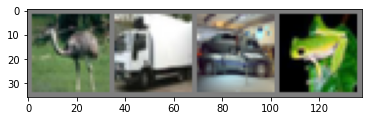

 bird truck   car  frog


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [23]:
import datetime

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [25]:
net_gpu = Net()
net_gpu.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
import torch.optim as optim

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
print(datetime.datetime.now().isoformat(), 'Start')

for epoch in range(2):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 2000 == 1999:
            print(datetime.datetime.now().isoformat(), '[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print(datetime.datetime.now().isoformat(), 'Finished Training')

2020-06-29T11:25:09.182681 Start
2020-06-29T11:25:22.167943 [1,  2000] loss: 2.202
2020-06-29T11:25:35.397531 [1,  4000] loss: 1.937
2020-06-29T11:25:48.507309 [1,  6000] loss: 1.729
2020-06-29T11:26:01.913577 [1,  8000] loss: 1.611
2020-06-29T11:26:15.029786 [1, 10000] loss: 1.538
2020-06-29T11:26:28.713405 [1, 12000] loss: 1.500
2020-06-29T11:26:45.031293 [2,  2000] loss: 1.390
2020-06-29T11:26:58.279118 [2,  4000] loss: 1.373
2020-06-29T11:27:11.026795 [2,  6000] loss: 1.333
2020-06-29T11:27:23.930036 [2,  8000] loss: 1.327
2020-06-29T11:27:37.124842 [2, 10000] loss: 1.300
2020-06-29T11:27:50.017592 [2, 12000] loss: 1.277
2020-06-29T11:27:53.299969 Finished Training


In [29]:
print(datetime.datetime.now().isoformat(), 'Start')

for epoch in range(2):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net_gpu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 2000 == 1999:
            print(datetime.datetime.now().isoformat(), '[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print(datetime.datetime.now().isoformat(), 'Finished Training')

2020-06-29T11:28:08.524048 Start
2020-06-29T11:28:21.621970 [1,  2000] loss: 2.305
2020-06-29T11:28:35.416359 [1,  4000] loss: 2.306
2020-06-29T11:28:49.234950 [1,  6000] loss: 2.305
2020-06-29T11:29:02.886899 [1,  8000] loss: 2.305
2020-06-29T11:29:16.539357 [1, 10000] loss: 2.305
2020-06-29T11:29:30.422628 [1, 12000] loss: 2.307
2020-06-29T11:29:47.216070 [2,  2000] loss: 2.306
2020-06-29T11:30:00.905035 [2,  4000] loss: 2.306
2020-06-29T11:30:14.674565 [2,  6000] loss: 2.306
2020-06-29T11:30:28.391223 [2,  8000] loss: 2.306
2020-06-29T11:30:42.291649 [2, 10000] loss: 2.305
2020-06-29T11:30:55.809531 [2, 12000] loss: 2.305
2020-06-29T11:30:59.096097 Finished Training


### Test

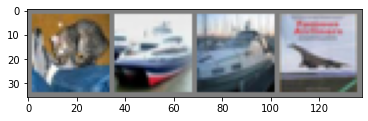

GroundTruth:    cat  ship  ship plane


In [31]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [32]:
outputs = net(images)

In [33]:
outputs

tensor([[-1.0694e+00, -1.6472e+00, -8.7924e-02,  2.5266e+00,  3.7710e-01,
          1.5988e+00,  3.9620e-01,  2.6891e-01, -2.3824e-01, -1.7913e+00],
        [ 3.9299e+00,  3.9550e+00, -2.4226e+00, -3.3754e+00, -3.4369e+00,
         -3.5891e+00, -5.3260e+00, -5.2201e+00,  6.5957e+00,  3.0327e+00],
        [ 1.3669e+00,  1.4511e+00, -4.3600e-01, -1.0794e+00, -1.2420e+00,
         -1.7389e+00, -2.3459e+00, -1.6152e+00,  2.1241e+00,  1.4490e+00],
        [ 1.9076e+00,  1.3992e-03,  2.4544e-01, -6.4283e-01, -8.5251e-01,
         -1.6291e+00, -1.2592e+00, -1.6564e+00,  2.3143e+00, -4.1837e-02]],
       grad_fn=<AddmmBackward>)

In [34]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [36]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [37]:
print(datetime.datetime.now().isoformat(), 'Start')

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_gpu(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print(datetime.datetime.now().isoformat, 'Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

print(datetime.datetime.now().isoformat(), 'End')

2020-06-29T11:34:14.376338 Start
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of plane :  0 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of   car :  0 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of  bird :  0 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of   cat :  0 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of  deer :  0 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of   dog :  5 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of  frog : 98 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of horse :  0 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Accuracy of  ship :  0 %
<built-in method isoformat of datetime.datetime object at 0x7fa2aad02b48> Ac